/tmp/ipykernel_1794422/3314915706.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: True if x > 0 else False)
/home/mouren/miniconda3/lib/python3.9/site-packages/upsetplot/plotting.py:662: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['black' '#0000002e' '#0000002e' '#0000002e' '#0000002e' 'black' 'black'
 '#0000002e' '#0000002e' '#0000002e' 'black' '#0000002e' 'black'
 '#0000002e' '#0000002e' 'black' '#0000002e' '#0000002e' 'black'
 '#0000002e' 'black' '#0000002e' '#0000002e' '#0000002e' 'black' 'black'
 'black' 'black' '#0000002e' '#0000002e' 'black' 'black' '#0000002e'
 'black' '#0000002e' 'black' '#0000002e' 'black' 'black' '#0000002e'
 'black' 'black' '#0000002e' '#0000002e' 'black' 'black' '#0000002e'
 'black' '#0000002e' 'black' 'black' 'black' 'black' 'black' '#0000002e'
 'black' 'black' 'black' '#0000002e' 'black' 'black' 'black' '#000000

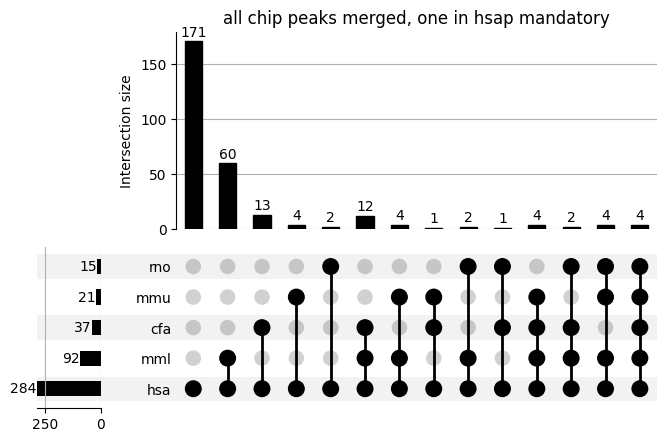

In [18]:
### all peaks merged 
import upsetplot as ups
from pathlib import Path
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42

df = pd.read_csv("/home/mouren/Data/conservation/epo_sbatcharray/Conservation_EPO_results_ee.tsv", sep="\t", index_col=0,header=0)
df = df.iloc[:, :-6]
df = df.applymap(lambda x: True if x > 0 else False)

df['hsa'] = df.iloc[:, :4].apply(lambda row: row.any(), axis=1)
df = df.iloc[:, 4:]

df['mmu'] = df.iloc[:, :4].apply(lambda row: row.any(), axis=1)
df = df.iloc[:, 4:]

df['mml'] = df.iloc[:, :4].apply(lambda row: row.any(), axis=1)
df = df.iloc[:, 4:]

df['cfa'] = df.iloc[:, :4].apply(lambda row: row.any(), axis=1)
df = df.iloc[:, 4:]

df['rno'] = df.iloc[:, :4].apply(lambda row: row.any(), axis=1)
df = df.iloc[:, 4:]

df = df[(df['hsa'])]

ups.UpSet(ups.from_indicators(lambda el: el.select_dtypes(bool),data=df),show_counts=True).plot()
plt.title("all chip peaks merged, one in hsap mandatory")
plt.savefig("/home/mouren/Images/tls1/conservation/epo/all_peaks_merged_epo_human_mandatory.pdf", format="pdf", bbox_inches="tight")